 <a name="titanic"></a>

# O Naufrágio do Titanic
<img src="titanic.jpg" width=100%>

O naufrágio do Titanic é um dos mais infames naufrágios da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia barcos salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas eram mais propensos a sobreviver do que outros.

Nesse desafio, pedimos que você construa um modelo preditivo que responda à pergunta: “que tipo de pessoas têm maior probabilidade de sobreviver?” Usando dados de passageiros (por exemplo, nome, idade, sexo, classe socioeconômica etc.).

Página da Competição: https://www.kaggle.com/c/titanic

Fontes de Consulta: 
* https://www.kaggle.com/startupsci/titanic-data-science-solutions
* https://www.kaggle.com/ash316/eda-to-prediction-dietanic
* https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
* https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy
* https://www.kaggle.com/cdeotte/titanic-using-name-only-0-81818
* https://www.kaggle.com/cdeotte/titantic-mega-model-0-84210
* https://www.kaggle.com/cdeotte/titanic-wcg-xgboost-0-84688
* https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c
* https://www.kaggle.com/reisel/save-the-families
* https://www.kaggle.com/gunesevitan/advanced-feature-engineering-tutorial-with-titanic


 <a name="aed"></a>

## Análise Exploratória de Dados (AED)
Esse passo é essencial, pois é através dele que iremos construir um entendimento intuitivo dos dados, entender como os parâmetros estão relacionados, procurar e encontrar tendências e relações entre diferentes parâmetros.


### Importar bibliotecas

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Ler train e test

In [3]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

### transformar definir o Id do Passageiro como Index

In [4]:
train.set_index('PassengerId', inplace=True)

In [5]:
test.set_index('PassengerId', inplace=True)

### Verificar shape dos dois

In [6]:
train.shape, test.shape

((891, 11), (418, 10))

In [7]:
data = pd.concat([train,test], sort=True)

### Traduzir Colunas

In [8]:
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [9]:
data.columns = ['Idade', 'Cabine', 'Embarque', 'Tarifa', 'Nome', 'PaisFilhos', 'Classe', 'Sexo',
       'IrmaosConjuge', 'Sobreviveu', 'Bilhete']

In [10]:
data.head()

,Idade,Cabine,Embarque,Tarifa,Nome,PaisFilhos,Classe,Sexo,IrmaosConjuge,Sobreviveu,Bilhete
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


 <a name="mapsex"></a>

### Mapear Sexo para "homem" e "mulher"

In [11]:
sexo = {'male': 'homem', 'female': 'mulher'}

In [12]:
data['Sexo'] = data['Sexo'].map(sexo)

In [13]:
data.head()

,Idade,Cabine,Embarque,Tarifa,Nome,PaisFilhos,Classe,Sexo,IrmaosConjuge,Sobreviveu,Bilhete
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,homem,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,mulher,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,mulher,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,mulher,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,homem,0,0.0,373450


 <a name="portembarque"></a>

 <a name="paracat"></a>

### Parâmetros Categóricos  <a name="nom"></a>
* ### Nominais

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Idade          1046 non-null   float64
 1   Cabine         295 non-null    object 
 2   Embarque       1307 non-null   object 
 3   Tarifa         1308 non-null   float64
 4   Nome           1309 non-null   object 
 5   PaisFilhos     1309 non-null   int64  
 6   Classe         1309 non-null   int64  
 7   Sexo           1309 non-null   object 
 8   IrmaosConjuge  1309 non-null   int64  
 9   Sobreviveu     891 non-null    float64
 10  Bilhete        1309 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [15]:
#Sexo, Embarque, Sobreviveu

 <a name="ord"></a>

* ### Ordinais

In [16]:
# Classe, 

 <a name="paranum"></a>

### Parâmetros Numéricos  <a name="cont"></a>
* ### Contínuos

In [17]:
# Idade, Tarifa

 <a name="disc"></a>

* ### Discretos

In [18]:
#PaisFilhos, IrmaosConjuge

 <a name="paraalfa"></a>

### Parâmetros Alfanuméricos

In [19]:
#Bilhete

 <a name="missing"></a>

### Dados incompletos (faltando dados)

In [20]:
data.isnull().sum()

Idade             263
Cabine           1014
Embarque            2
Tarifa              1
Nome                0
PaisFilhos          0
Classe              0
Sexo                0
IrmaosConjuge       0
Sobreviveu        418
Bilhete             0
dtype: int64

<a name="numinfo"></a>

### Preencher Embarque com Moda

In [21]:
moda_embarque = data['Embarque'].mode()[0]
moda_embarque

'S'

In [22]:
data['Embarque'].fillna(moda_embarque, inplace=True)

### Informações Gerais (Parâmetros Numéricos)

In [23]:
data.describe()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge,Sobreviveu
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


 <a name="catinfo"></a>

### Informações Gerais de Parâmetros Categóricos

In [24]:
data.describe(include=['O'])

,Cabine,Embarque,Nome,Sexo,Bilhete
count,295,1309,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Connolly, Miss. Kate",homem,CA. 2343
freq,6,916,2,843,11


 <a name="infoamostra"></a>

## Informações da Amostra

### Tamanho da Amostra

In [25]:
len(data)

1309

### Proporção Total da Amostra em relação à População

In [26]:
len(train)/2224

0.4006294964028777

### Proporção de Sobreviventes (População)

In [27]:
1-1502/2224

0.32464028776978415

### Proporção de Sobreviventes (Amostra)

In [28]:
342/len(train)

0.3838383838383838

 <a name="agrupamentos"></a>

# Agrupamentos



### Agrupar Classe x Sobrevivência

In [29]:
# Média de sobrevivencia por classe
data[['Classe', 'Sobreviveu']].groupby(['Classe'])\
.mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
Classe,
1,0.629630
2,0.472826
3,0.242363


* Passageiros de Primeira Classe são muito mais propensos a sobreviver do que de Segunda e Terceira Classe
* Passageiros de Segunda Classe são menos propensos a sobreviver do que de Primeira Classe, mas são mais propensos a sobreviver do que de Terceira Classe

### Agrupar Sexo x Sobrevivência

In [30]:
# Média de sobrevivencia por sexo
data[['Sexo', 'Sobreviveu']].groupby(['Sexo'])\
.mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
Sexo,
mulher,0.742038
homem,0.188908


* 74% das mulheres sobreviveram em contraste com 18,89% dos homens da nossa amostra

### Agrupar IrmaosConjuge x Sobrevivência

In [31]:
# Média de sobrevivencia por IrmaosConjuge
data[['IrmaosConjuge', 'Sobreviveu']].groupby(['IrmaosConjuge'])\
.mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
IrmaosConjuge,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


### Agrupar PaisFilhos x Sobrevivência

In [32]:
# Média de sobrevivencia por PaisFilhos
data[['PaisFilhos', 'Sobreviveu']].groupby(['PaisFilhos'])\
.mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
PaisFilhos,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000
9,NaN


### Correlação de IrmaosConjuge e PaisFilhos

In [33]:
data[['IrmaosConjuge', 'PaisFilhos']].corr()

,IrmaosConjuge,PaisFilhos
IrmaosConjuge,1.000000,0.373587
PaisFilhos,0.373587,1.000000


* IrmaosConjuge e PaisFilhos não possuem uma correlação muito forte. Talvez seja o caso juntá-los como um único recurso depois

 <a name="vidados"></a>

# Visualização de Dados
Observar os dados de forma visual para averiguar as suposições feitas até agora



### Gráfico de Barras e Pizza de Sobreviventes

Text(0, 0.5, '')

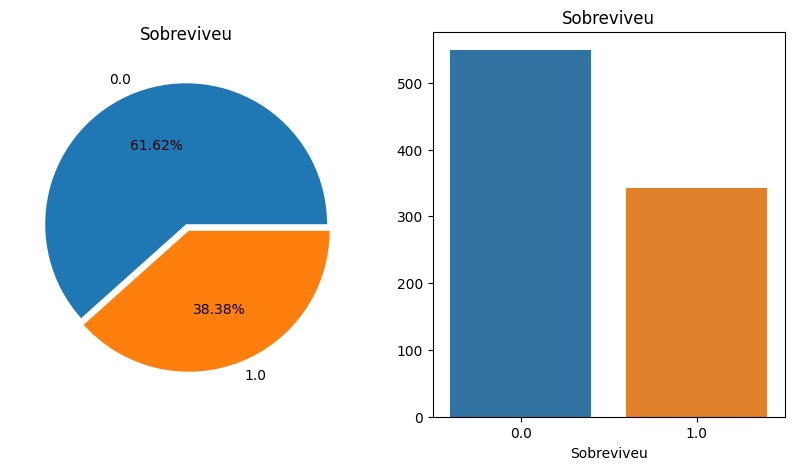

In [34]:
f,ax = plt.subplots(1,2,figsize=(10,5))
data['Sobreviveu'].value_counts().plot.pie(explode=[0,0.05], autopct='%0.2f%%', ax=ax[0])
ax[0].set_title('Sobreviveu')
ax[0].set_ylabel('')

sns.countplot(x='Sobreviveu', data=data, ax=ax[1])
ax[1].set_title('Sobreviveu')
ax[1].set_ylabel('')



* Pode-se notar que a quantidade de pessoas que não sobreviveu foi muito maior que as pessoas que sobreviveram.

## Sobrevivência Por Sexo

In [35]:
data.groupby(['Sexo', 'Sobreviveu'])['Sobreviveu'].count()

Sexo    Sobreviveu
homem   0.0           468
        1.0           109
mulher  0.0            81
        1.0           233
Name: Sobreviveu, dtype: int64

In [36]:
data.loc[data['Sexo']=='mulher']['Sobreviveu'].value_counts()

1.0    233
0.0     81
Name: Sobreviveu, dtype: int64

<a name="barrassob"></a>

### Gráfico de Barras de Sobreviventes por Sexo

<Axes: xlabel='Sexo', ylabel='count'>

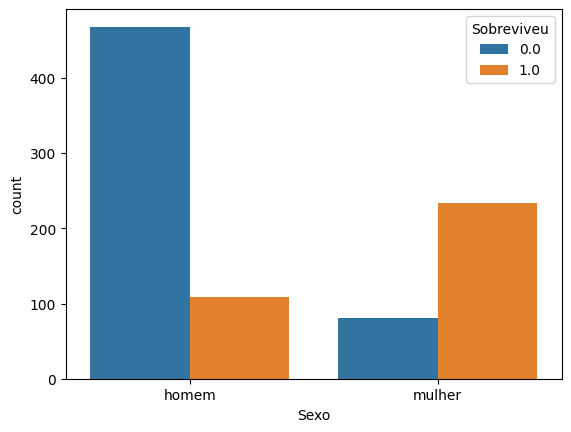

In [37]:
sns.countplot(x='Sexo', hue='Sobreviveu', data=data)

* Pode-se notar que a grande maioria dos homens não sobreviveu, ao contrário do gráfico das mulheres.

<a name="histidsob"></a>

### Histograma de Idade x Sobreviveu

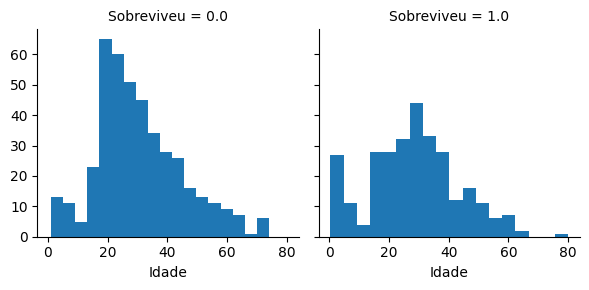

In [38]:
g = sns.FacetGrid(data, col='Sobreviveu')
g.map(plt.hist, 'Idade', bins=18)

* Crianças sobreviveram mais;
* O passageiro mais idoso sobreviveu;
* A maioria dos passageiros estão na faixa de 18 e 35 anos (E a maioria não sobreviveu)

<a name="histclassidsob"></a>

### Histograma de Idade x Classe x Sobreviveu com FacetGrid

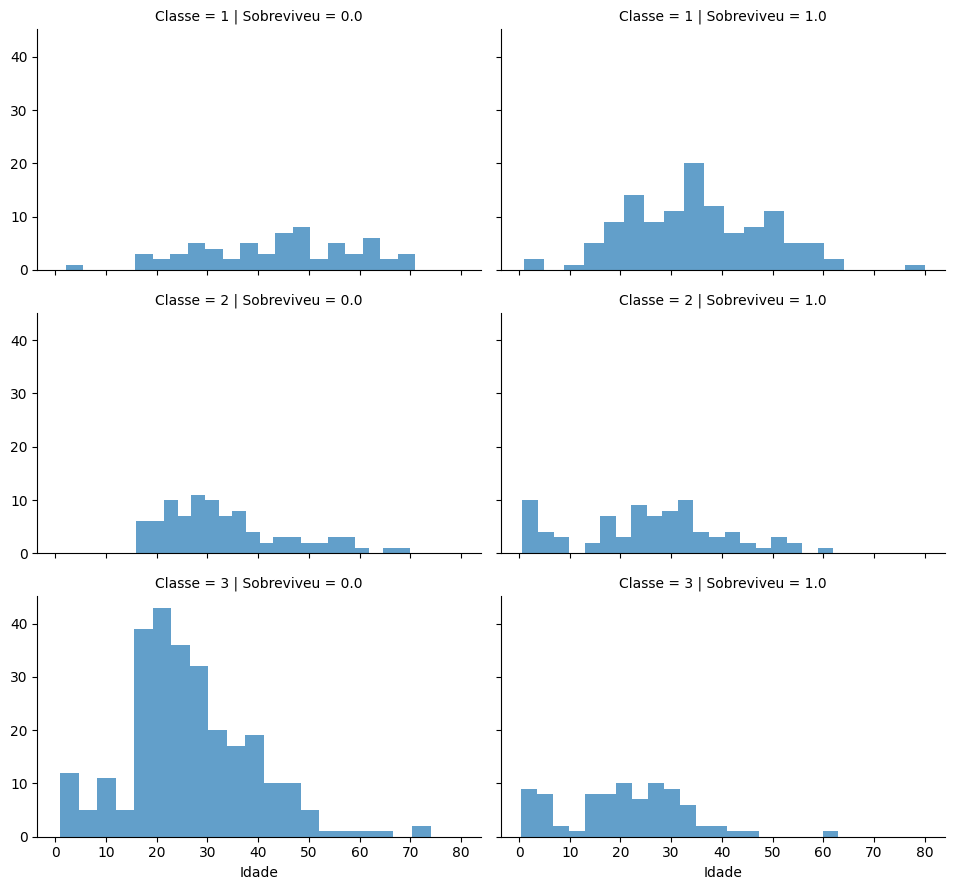

In [39]:
grid = sns.FacetGrid(data, col='Sobreviveu', row='Classe', aspect=1.6)
grid.map(plt.hist, 'Idade', alpha=0.7, bins=20)
grid.add_legend()

* É possível notar que a diferença das classes dos passageiros impactou se eles sobreviveram ou não.

<a name="chancesporto"></a>

### Chances de Sobrevivência por Porto de Embarque

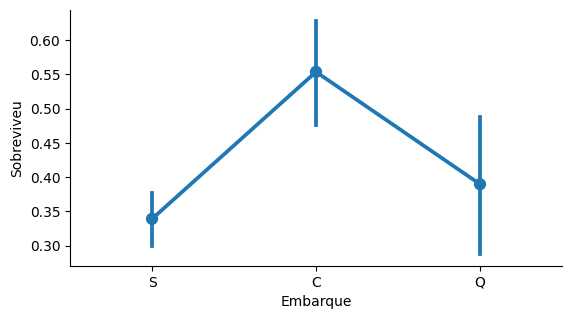

In [40]:
sns.catplot(x='Embarque', y='Sobreviveu', data=data, kind='point')
fig=plt.gcf()
fig.set_size_inches(6,3)


<a name="pointplotembarque"></a>

* Portão S: a grande maioria morreu;
* Portão C: a maioria sobreviveu;
* Portão Q: fica entre o meio termo.

### Embarque x Classe x Sobreviveu

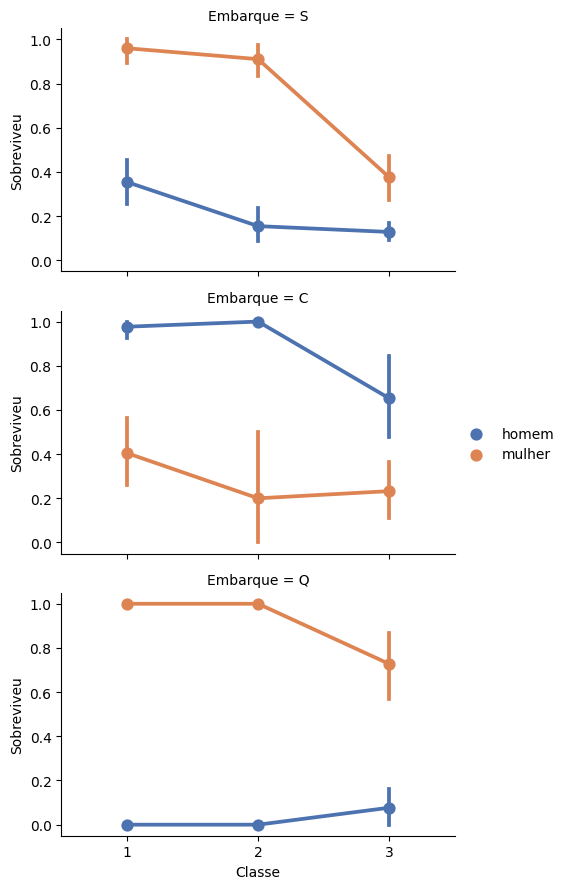

In [41]:
grid = sns.FacetGrid(data, row='Embarque', aspect=1.6)
grid.map(sns.pointplot, 'Classe', 'Sobreviveu', 'Sexo', palette='deep')
grid.add_legend()

### Agrupar mulheres por sobrevivência

In [42]:
data.loc[data['Sexo']=='mulher'].groupby('Sobreviveu').mean()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge
Sobreviveu,,,,,
0.0,25.046875,23.024385,1.037037,2.851852,1.209877
1.0,28.847716,51.938573,0.515021,1.918455,0.515021


### Agrupar homens por sobrevivência

In [43]:
data.loc[data['Sexo']=='homem'].groupby('Sobreviveu').mean()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge
Sobreviveu,,,,,
0.0,31.618056,21.960993,0.207265,2.476496,0.440171
1.0,27.276022,40.821484,0.357798,2.018349,0.385321


<a name="graficobarras"></a>

### Gráfico de Barras Sexo x Tarifa por Sexo



<Axes: xlabel='Sexo', ylabel='Tarifa'>

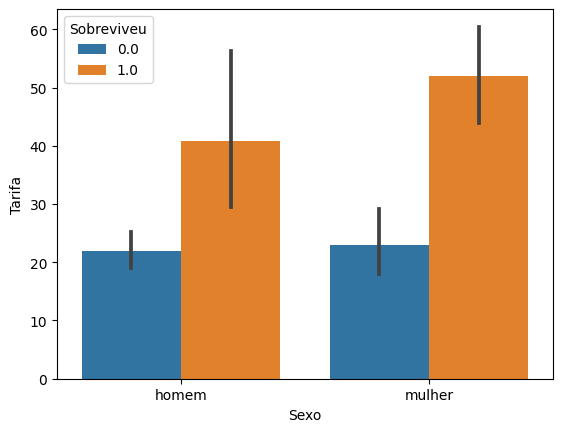

In [44]:
sns.barplot(x='Sexo', y='Tarifa', hue='Sobreviveu', data=data)

<a name="graficobarrassex"></a>

### Gráfico de Barras Sexo x Tarifa x Embarque x Sobreviveu

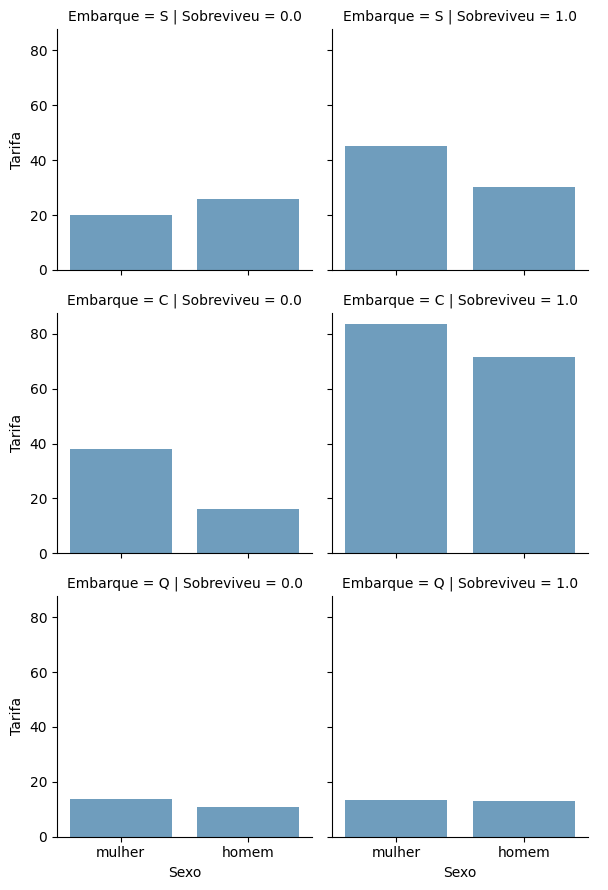

In [45]:
grid = sns.FacetGrid(data, row='Embarque', col='Sobreviveu', aspect=1)
grid.map(sns.barplot, 'Sexo', 'Tarifa', alpha=0.7, ci=None)
grid.add_legend()

<a name="pizza"></a>

### Crosstab de Sobrevivência por Classe

In [46]:
pd.crosstab(data['Sobreviveu'], data['Classe'], margins=True)\
.style.background_gradient(cmap='OrRd')

Classe,1,2,3,All
Sobreviveu,,,,
0.000000,80,97,372,549
1.000000,136,87,119,342
All,216,184,491,891


<a name="vimissing"></a>

## Visualizando Dados Faltando


<Axes: ylabel='PassengerId'>

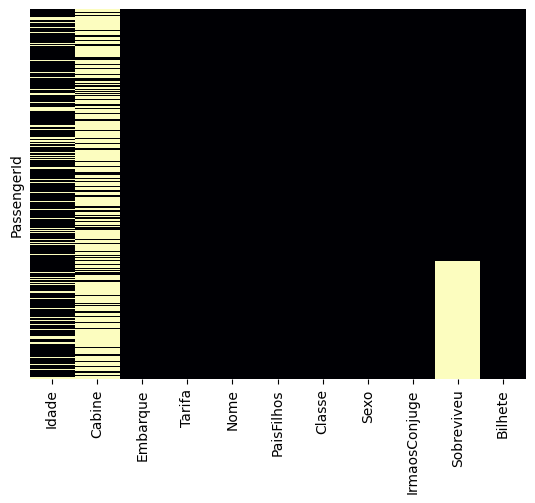

In [47]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='magma')

* Dados faltando na idade
* Muitos dados faltando na cabine
* E os dados faltando no train da sobrevivencia

### Remover Cabine

In [48]:
data.drop(['Cabine'], axis=1, inplace=True)

<a name="boxplot"></a>

### Boxplot de Classe por Sexo

<Axes: xlabel='Classe', ylabel='Idade'>

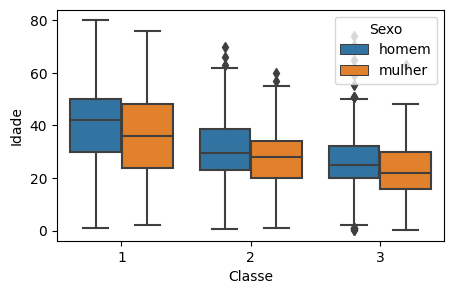

In [49]:
plt.figure(figsize=(5,3), dpi=100)
sns.boxplot(x='Classe', y='Idade', hue='Sexo', data=data)

<a name="engenharia"></a>

# Engenharia de Recursos



### Extrair Titulo do Nome

In [50]:
data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

In [51]:
data['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [52]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [53]:
data['Titulo'] = data['Titulo'].apply(lambda x: 'Outros' if x not in ['Miss','Master','Mr','Mrs'] else x)

In [54]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


### Traduzir "Titulos"

In [55]:
data.loc[data['Titulo']=='Master'].mean()

Idade             5.482642
Tarifa           36.008195
PaisFilhos        1.377049
Classe            2.655738
IrmaosConjuge     2.049180
Sobreviveu        0.575000
dtype: float64

In [56]:
titulos_traduzidos = {
    'Master': 'Menino',
    'Miss': 'Solteira',
    'Mr': 'HomemAdulto',
    'Mrs': 'Casada',
    'Outros': 'Outros'
}

In [57]:
data['Titulo'] = data['Titulo'].map(titulos_traduzidos)

# Mulheres e Crianças sobreviveram ou morreram juntos?

## Extrair sobrenome para identificar possíveis famílias

In [58]:
['Braund',  'Mr. Owen Harris'][0]

'Braund'

### Criar Feature Sobrenome da Família

In [59]:
data['Sobrenome'] = data['Nome'].str.split(',').str[0]
data['Sobrenome']

PassengerId
1              Braund
2             Cumings
3           Heikkinen
4            Futrelle
5               Allen
            ...      
1305          Spector
1306    Oliva y Ocana
1307          Saether
1308             Ware
1309            Peter
Name: Sobrenome, Length: 1309, dtype: object

### Verificar as maiores famílias

In [60]:
data.groupby(['Sobrenome'])['Nome'].count().sort_values(ascending=False)

Sobrenome
Andersson         11
Sage              11
Goodwin            8
Asplund            8
Davies             7
                  ..
Humblen            1
Hunt               1
Hyman              1
Ibrahim Shawah     1
van Melkebeke      1
Name: Nome, Length: 875, dtype: int64

### Analisar Sobrevivência de Mulheres e Crianças da Família "Andersson"

In [61]:
data[['Sobreviveu', 'Titulo', 'Sobrenome', 'Bilhete']].loc[data['Sobrenome']=='Andersson']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
69,1.0,Solteira,Andersson,3101281
120,0.0,Solteira,Andersson,347082
542,0.0,Solteira,Andersson,347082
543,0.0,Solteira,Andersson,347082
611,0.0,Casada,Andersson,347082
814,0.0,Solteira,Andersson,347082
851,0.0,Menino,Andersson,347082
1106,NaN,Solteira,Andersson,347091


* Na família Andersson, é possível notar que a passageira de ID 69 não faz parte da mesma 6 familias, tendo alta possibilidade de não fazer parte da emsma família;
* Desta forma, a família Andersson de 6 pessoas morreram juntas.

### Mulheres e Crianças da Família "Sage"

In [62]:
data[['Sobreviveu', 'Titulo', 'Sobrenome', 'Bilhete']].loc[data['Sobrenome']=='Sage']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
160,0.0,Menino,Sage,CA. 2343
181,0.0,Solteira,Sage,CA. 2343
793,0.0,Solteira,Sage,CA. 2343
864,0.0,Solteira,Sage,CA. 2343
1080,NaN,Solteira,Sage,CA. 2343
1252,NaN,Menino,Sage,CA. 2343
1257,NaN,Casada,Sage,CA. 2343


* Com os bilhetes sendo iguais para a família Sage, as 4 primeiras pessoas não sobreviveram e queremos que o modelo preditivo consiga dizer que as ultimas 3 pessoas da família também não sobreviveram.

### Mulheres e Crianças da Família "Brown"

In [63]:
data[['Sobreviveu', 'Titulo', 'Sobrenome', 'Bilhete']].loc[data['Sobrenome']=='Brown']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
195,1.0,Casada,Brown,PC 17610
346,1.0,Solteira,Brown,248733
671,1.0,Casada,Brown,29750
1067,NaN,Solteira,Brown,29750
1248,NaN,Casada,Brown,11769


* Da mesma forma que a família Sage, esta família conseguiu sobreviver. E queremos que o modelo consiga prever que eçes sobreviveram.

### Criar DataFrame "MulherOuCrianca"

In [64]:
MulherOuCrianca = data.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

In [65]:
MulherOuCrianca['Titulo'].unique()

array(['Casada', 'Solteira', 'Menino', 'Outros'], dtype=object)

### Criar Feature "TamanhoGrupo"
Referente a quantidade de Pessoas que possuem o mesmo sobrenome

In [66]:
MulherOuCrianca.loc[MulherOuCrianca['Sobrenome']=='Brown']['Sobreviveu'].count()

3

In [67]:
data['TamanhoGrupo'] = data['Sobrenome'].apply(lambda x: MulherOuCrianca.loc[MulherOuCrianca['Sobrenome']==x]['Sobreviveu'].count())

### Sobrevivência Família "Andersson"

In [68]:
data[['TamanhoGrupo', 'Sobrenome', 'Titulo', 'Sobreviveu']].sort_values(by='TamanhoGrupo', ascending=False).head(10)

,TamanhoGrupo,Sobrenome,Titulo,Sobreviveu
PassengerId,,,,
1212,7,Andersson,HomemAdulto,NaN
69,7,Andersson,Solteira,1.0
611,7,Andersson,Casada,0.0
120,7,Andersson,Solteira,0.0
147,7,Andersson,HomemAdulto,1.0
1106,7,Andersson,Solteira,NaN
814,7,Andersson,Solteira,0.0
543,7,Andersson,Solteira,0.0
851,7,Andersson,Menino,0.0


In [69]:
for idx, _ in data.iterrows():
    if data['Titulo'].at[idx]=='HomemAdulto':
        data['TamanhoGrupo'].at[idx]=0

### Criar Recurso "SobrevivenciaGrupo"

In [70]:
data[['Titulo', 'Sobreviveu']].loc[data['Sobrenome']=='Andersson']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')].mean()['Sobreviveu']

0.14285714285714285

In [71]:
data['SobrevivenciaGrupo'] = data['Sobrenome'].apply(lambda x: data[['Titulo', 'Sobreviveu']].loc[data['Sobrenome']==x]\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')].mean()['Sobreviveu'])

In [72]:
data[['SobrevivenciaGrupo', 'Titulo']]

,SobrevivenciaGrupo,Titulo
PassengerId,,
1,NaN,HomemAdulto
2,1.0,Casada
3,1.0,Solteira
4,1.0,Casada
5,1.0,HomemAdulto
...,...,...
1305,NaN,HomemAdulto
1306,NaN,Outros
1307,NaN,HomemAdulto


In [73]:
for idx, _ in data.iterrows():
    if data['Titulo'].at[idx]=='HomemAdulto':
        data['SobrevivenciaGrupo'].at[idx]=0

In [74]:
data[['SobrevivenciaGrupo', 'Titulo']]

,SobrevivenciaGrupo,Titulo
PassengerId,,
1,0.0,HomemAdulto
2,1.0,Casada
3,1.0,Solteira
4,1.0,Casada
5,0.0,HomemAdulto
...,...,...
1305,0.0,HomemAdulto
1306,NaN,Outros
1307,0.0,HomemAdulto


In [75]:
data['SobrevivenciaGrupo'].isnull().sum()

119

In [76]:
data['SobrevivenciaGrupo'].fillna(0, inplace=True)

In [77]:
data['SobrevivenciaGrupo'].isnull().sum()

0

###  Grupos de Mulheres e Criancas onde todos morreram juntos

In [78]:
data[['Sobrenome', 'Titulo']].loc[(data['SobrevivenciaGrupo']==0)\
         & (data['TamanhoGrupo']>1)]\
            .loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Palsson', 'Rice', 'Vander Planke', 'Panula', 'Goodwin', 'Skoog',
       'Zabour', 'Jussila', 'Boulos', 'Ford', 'Sage', 'Lefebre', 'Strom',
       'Barbara', 'Van Impe', 'Bourke'], dtype=object)

### Quantidade de Pessoas (morreram)

In [79]:
data[['Sobrenome', 'Titulo', 'Sobreviveu']].loc[(data['SobrevivenciaGrupo']==0)\
         & (data['TamanhoGrupo']>1)]\
            .loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobreviveu'].count()

50

###  Grupos de Mulheres e Criancas onde todos sobreviveram juntos

In [80]:
data[['Sobrenome', 'Titulo']].loc[(data['SobrevivenciaGrupo']==1)\
         & (data['TamanhoGrupo']>1)]\
            .loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Johnson', 'Sandstrom', 'Nicola-Yarred', 'Laroche', 'Harper',
       'West', 'Moubarek', 'Caldwell', 'Fortune', 'Doling', 'Peter',
       'Goldsmith', 'Becker', 'Navratil', 'Brown', 'Newell', 'Collyer',
       'Murphy', 'Hamalainen', 'Graham', 'Mellinger', 'Kelly', 'Hays',
       'Ryerson', 'Wick', 'Hippach', 'Coutts', 'Richards', 'Hart',
       'Baclini', 'Quick', 'Taussig', 'Herman', 'Moor'], dtype=object)

### Quantidade de Pessoas (sobreviveram)

In [81]:
data[['Sobrenome', 'Titulo', 'Sobreviveu']].loc[(data['SobrevivenciaGrupo']==1)\
         & (data['TamanhoGrupo']>1)]\
            .loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobreviveu'].count()

74

###  Grupos de Mulheres e Criancas com sobrevivência mista

In [82]:
data[['Sobrenome', 'Titulo']].loc[(data['SobrevivenciaGrupo']>0)\
        & (data['SobrevivenciaGrupo']<1)
        & (data['TamanhoGrupo']>1)]\
        .loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Asplund', 'Andersson', 'Allison', 'Carter'], dtype=object)

### Quantidade de Pessoas (sobrevivência mista)

In [83]:
data[['Sobrenome', 'Titulo', 'Sobreviveu']].loc[(data['SobrevivenciaGrupo']>0)\
        & (data['SobrevivenciaGrupo']<1)
        & (data['TamanhoGrupo']>1)]\
        .loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobreviveu'].count()

18

### Criar Recurso ExpecativaDeVida

In [84]:
data['ExpectativaDeVida'] = ''
for idx, _ in data.iterrows():
    if (data['SobrevivenciaGrupo'].at[idx]==0) & (data['TamanhoGrupo'].at[idx]>1):
        data['ExpectativaDeVida'].at[idx] = 'morrer'
    elif (data['SobrevivenciaGrupo'].at[idx]==1) & (data['TamanhoGrupo'].at[idx]>1):
        data['ExpectativaDeVida'].at[idx] = 'viver'
    else:
        data['ExpectativaDeVida'].at[idx] = 'desconhecida'

#viver
#morrer
#desconhecida

In [85]:
pd.crosstab(data['ExpectativaDeVida'], data['Sobreviveu'])

Sobreviveu,0.0,1.0
ExpectativaDeVida,,
desconhecida,498,268
morrer,50,0
viver,1,74


### Poderíamos linkar com o Bilhete
Uma vez que não necessariamente esses grupos são da mesma família, e nem todos que possuem o mesmo sobrenome são da mesma família. Porém, existem divergências ao análisar apenas os bilhetes. O ideal seria combiná-los para gerar ainda mais insights.

<a name="dummy"></a>

### Remover Colunas que não serão mais utilizadas

In [86]:
data.isnull().sum()

Idade                 263
Embarque                0
Tarifa                  1
Nome                    0
PaisFilhos              0
Classe                  0
Sexo                    0
IrmaosConjuge           0
Sobreviveu            418
Bilhete                 0
Titulo                  0
Sobrenome               0
TamanhoGrupo            0
SobrevivenciaGrupo      0
ExpectativaDeVida       0
dtype: int64

In [87]:
data.drop(['Nome', 'Bilhete', 'Sobrenome'], axis=1, inplace=True)

# Variáveis Dummy



In [88]:
data.describe(include= 'O')

,Embarque,Sexo,Titulo,ExpectativaDeVida
count,1309,1309,1309,1309
unique,3,2,5,3
top,S,homem,HomemAdulto,desconhecida
freq,916,843,757,1159


In [89]:
data.columns

Index(['Idade', 'Embarque', 'Tarifa', 'PaisFilhos', 'Classe', 'Sexo',
       'IrmaosConjuge', 'Sobreviveu', 'Titulo', 'TamanhoGrupo',
       'SobrevivenciaGrupo', 'ExpectativaDeVida'],
      dtype='object')

In [90]:
data = pd.get_dummies(data, columns=['Classe', 'Embarque', 'Titulo', 'ExpectativaDeVida', 'Sexo'], drop_first=True)

In [91]:
data.shape

(1309, 18)

# Usar Predição da Idade



In [92]:
idade = pd.read_csv('idade_completa.csv')

In [93]:
idade.set_index('IdPassageiro', inplace=True)

In [94]:
idade.shape

(1309, 1)

In [95]:
data.drop('Idade', axis=1, inplace=True)

In [96]:
data.shape

(1309, 17)

In [97]:
data = pd.concat([data, idade], axis=1)

In [98]:
data.shape

(1309, 18)

## Preencher Tarifa Faltando Com a Média



In [99]:
data.isnull().sum()

Tarifa                        1
PaisFilhos                    0
IrmaosConjuge                 0
Sobreviveu                  418
TamanhoGrupo                  0
SobrevivenciaGrupo            0
Classe_2                      0
Classe_3                      0
Embarque_Q                    0
Embarque_S                    0
Titulo_HomemAdulto            0
Titulo_Menino                 0
Titulo_Outros                 0
Titulo_Solteira               0
ExpectativaDeVida_morrer      0
ExpectativaDeVida_viver       0
Sexo_mulher                   0
Idade                         0
dtype: int64

In [100]:
tarifa_media = data['Tarifa'].mean()
tarifa_media

33.29547928134557

In [101]:
data['Tarifa'].fillna(tarifa_media, inplace=True)

In [102]:
data.isnull().sum()

Tarifa                        0
PaisFilhos                    0
IrmaosConjuge                 0
Sobreviveu                  418
TamanhoGrupo                  0
SobrevivenciaGrupo            0
Classe_2                      0
Classe_3                      0
Embarque_Q                    0
Embarque_S                    0
Titulo_HomemAdulto            0
Titulo_Menino                 0
Titulo_Outros                 0
Titulo_Solteira               0
ExpectativaDeVida_morrer      0
ExpectativaDeVida_viver       0
Sexo_mulher                   0
Idade                         0
dtype: int64

<a name="faixaetaria"></a>

# Criar Faixa Etária


In [103]:
data['FaixaEtaria'] = pd.cut(x=data['Idade'].astype('int'), bins=5)

In [104]:
pd.crosstab(data['FaixaEtaria'], data['Sobreviveu'])

Sobreviveu,0.0,1.0
FaixaEtaria,,
"(-0.08, 16.0]",55,58
"(16.0, 32.0]",318,165
"(32.0, 48.0]",127,88
"(48.0, 64.0]",39,30
"(64.0, 80.0]",10,1


 <a name="dummyfe"></a>

### Dummy Faixa Etaria

In [105]:
data = pd.get_dummies(data, columns=['FaixaEtaria'], drop_first=True)

In [106]:
data.shape

(1309, 22)

 <a name="familiares"></a>

### Criar Recurso "Familiares" _(Feature Engeneering)_ 
Baseados em IrmaosConjuge e PaisFilhos



In [107]:
data['Familiares'] = data['IrmaosConjuge']+data['PaisFilhos']

<Axes: >

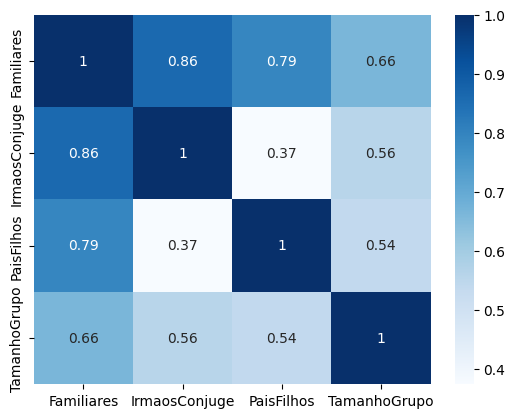

In [108]:
sns.heatmap(data[['Familiares', 'IrmaosConjuge', 'PaisFilhos', 'TamanhoGrupo']].corr(), annot=True, cmap='Blues')

 <a name="sozinho"></a>

### Criar Parâmetro "Sozinho"_(Feature Engeneering)_
Pessoa que não está com nenhum familiar



In [109]:
sozinho = data['Familiares']==0

In [110]:
data['Sozinho'] = sozinho.map({True: 1, False: 0})

In [111]:
data.shape

(1309, 24)

## Atualizar train e test 

In [112]:
train.shape

(891, 11)

In [113]:
train = data.loc[train.index]

In [114]:
train.shape

(891, 24)

In [115]:
test = data.loc[test.index]

In [116]:
test.shape

(418, 24)

In [117]:
test.drop('Sobreviveu', axis=1, inplace=True)

In [118]:
test.shape

(418, 23)

In [119]:
test.isnull().sum()

Tarifa                      0
PaisFilhos                  0
IrmaosConjuge               0
TamanhoGrupo                0
SobrevivenciaGrupo          0
Classe_2                    0
Classe_3                    0
Embarque_Q                  0
Embarque_S                  0
Titulo_HomemAdulto          0
Titulo_Menino               0
Titulo_Outros               0
Titulo_Solteira             0
ExpectativaDeVida_morrer    0
ExpectativaDeVida_viver     0
Sexo_mulher                 0
Idade                       0
FaixaEtaria_(16.0, 32.0]    0
FaixaEtaria_(32.0, 48.0]    0
FaixaEtaria_(48.0, 64.0]    0
FaixaEtaria_(64.0, 80.0]    0
Familiares                  0
Sozinho                     0
dtype: int64

In [120]:
train.isnull().sum()

Tarifa                      0
PaisFilhos                  0
IrmaosConjuge               0
Sobreviveu                  0
TamanhoGrupo                0
SobrevivenciaGrupo          0
Classe_2                    0
Classe_3                    0
Embarque_Q                  0
Embarque_S                  0
Titulo_HomemAdulto          0
Titulo_Menino               0
Titulo_Outros               0
Titulo_Solteira             0
ExpectativaDeVida_morrer    0
ExpectativaDeVida_viver     0
Sexo_mulher                 0
Idade                       0
FaixaEtaria_(16.0, 32.0]    0
FaixaEtaria_(32.0, 48.0]    0
FaixaEtaria_(48.0, 64.0]    0
FaixaEtaria_(64.0, 80.0]    0
Familiares                  0
Sozinho                     0
dtype: int64

## Utilizar train para treinar o modelo

In [121]:
X = train.drop('Sobreviveu', axis=1)

In [122]:
y = train['Sobreviveu']

In [123]:
X.shape, y.shape

((891, 23), (891,))

### Escolher colunas

In [124]:
X.columns

Index(['Tarifa', 'PaisFilhos', 'IrmaosConjuge', 'TamanhoGrupo',
       'SobrevivenciaGrupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
       'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino', 'Titulo_Outros',
       'Titulo_Solteira', 'ExpectativaDeVida_morrer',
       'ExpectativaDeVida_viver', 'Sexo_mulher', 'Idade',
       'FaixaEtaria_(16.0, 32.0]', 'FaixaEtaria_(32.0, 48.0]',
       'FaixaEtaria_(48.0, 64.0]', 'FaixaEtaria_(64.0, 80.0]', 'Familiares',
       'Sozinho'],
      dtype='object')

In [125]:
recursos = ['Tarifa', 'PaisFilhos', 'IrmaosConjuge', 'TamanhoGrupo',
       'SobrevivenciaGrupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
       'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino', 'Titulo_Outros',
       'Titulo_Solteira', 'ExpectativaDeVida_morrer',
       'ExpectativaDeVida_viver', 'Sexo_mulher', 'Idade',
       'FaixaEtaria_(16.0, 32.0]', 'FaixaEtaria_(32.0, 48.0]',
       'FaixaEtaria_(48.0, 64.0]', 'FaixaEtaria_(64.0, 80.0]', 'Familiares',
       'Sozinho']

In [126]:
X[recursos]

,Tarifa,PaisFilhos,IrmaosConjuge,TamanhoGrupo,SobrevivenciaGrupo,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_HomemAdulto,...,ExpectativaDeVida_morrer,ExpectativaDeVida_viver,Sexo_mulher,Idade,"FaixaEtaria_(16.0, 32.0]","FaixaEtaria_(32.0, 48.0]","FaixaEtaria_(48.0, 64.0]","FaixaEtaria_(64.0, 80.0]",Familiares,Sozinho
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,7.2500,0,1,0,0.0,0,1,0,1,1,...,0,0,0,22.000000,1,0,0,0,1,0
2,71.2833,0,1,1,1.0,0,0,0,0,0,...,0,0,1,38.000000,0,1,0,0,1,0
3,7.9250,0,0,1,1.0,0,1,0,1,0,...,0,0,1,26.000000,1,0,0,0,0,1
4,53.1000,0,1,1,1.0,0,0,0,1,0,...,0,0,1,35.000000,0,1,0,0,1,0
5,8.0500,0,0,0,0.0,0,1,0,1,1,...,0,0,0,35.000000,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,13.0000,0,0,0,0.0,1,0,0,1,0,...,0,0,0,27.000000,1,0,0,0,0,1
888,30.0000,0,0,2,1.0,0,0,0,1,0,...,0,1,1,19.000000,1,0,0,0,0,1
889,23.4500,2,1,1,0.0,0,1,0,1,0,...,0,0,1,10.537041,0,0,0,0,3,0


### Averiguando Shapes 

In [127]:
X.shape, y.shape

((891, 23), (891,))

### Importar train_test_split para dividir e preparar para treino

In [128]:
from sklearn.model_selection import train_test_split

### Dividir 70% para treinar, 30% para testar

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [130]:
X_train.shape, y_train.shape

((623, 23), (623,))

In [131]:
X_test.shape, y_test.shape

((268, 23), (268,))

<a name="ml"></a>

# Machine Learning <a name="modelospred"></a>


## Importando Modelos Preditivos

In [132]:
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier,
                              RandomForestClassifier)

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

<a name="LogisticRegression"></a>

### Criar classe ModeloAuxiliar 
Uma classe modelo para evitar duplicação de códigos

In [134]:
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=123, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def score(self,x,y):
        return self.clf.score(x,y)

In [135]:
modelos = [{'nome': 'logreg',
            'modelo': LogisticRegression},
           {'nome': 'etree',
            'modelo': ExtraTreesClassifier},
           {'nome': 'gradboost',
             'modelo': GradientBoostingClassifier}, 
           {'nome': 'adaboost',
             'modelo': AdaBoostClassifier},
           {'nome': 'SVC',
            'modelo': SVC},
           {'nome': 'KNN',
            'modelo': KNeighborsClassifier},
           {'nome': 'GaussianNB',
            'modelo': GaussianNB},
           {'nome': 'Perceptron',
            'modelo': Perceptron},
           {'nome': 'LinearSVC',
            'modelo': LinearSVC},
           {'nome': 'SGD',
            'modelo': SGDClassifier},
           {'nome': 'Dtree',
            'modelo': DecisionTreeClassifier},
           {'nome': 'RForest',
            'modelo': RandomForestClassifier}
          ]

In [136]:
modelos[-1]['nome']

'RForest'

In [137]:
resultados = []
for model in modelos:
    x = ModeloAuxiliar(clf=model['modelo'])
    #treinar o modelo
    x.fit(X_train, y_train)

    #gerar predição
    x_pred = x.predict(X_test)

    #gerar score
    acuracidade = round(x.score(X_test, y_test)*100, 2)

    resultados.append({
        'nome': model['nome'],
        'score': acuracidade,
        'pred': x_pred
    })


<a name="ranking"></a>

# Ranking de Modelos Por Score



In [138]:
models = pd.DataFrame(resultados)

In [139]:
models[['nome', 'score']].sort_values(by='score', ascending=False)

,nome,score
2,gradboost,91.42
3,adaboost,90.30
0,logreg,89.93
8,LinearSVC,89.93
11,RForest,88.81
9,SGD,86.19
6,GaussianNB,85.07
1,etree,84.33
10,Dtree,82.46
5,KNN,75.00


<a name="cv"></a>

# Validação Cruzada _(Cross-Validation)_



* A ideia da validação cruzada divide em várias partes para fazer a validação, n vezes diferente. Vai passar por todo o dataframe. Não vai superadequar o modelo, ou seja, vai fazer varios testes, varios treinos e varios splits pra ter uma melhor ideia de como irá funcionar no mundo real. Já que orá fazer os teste em várias ocasiões diferentes, em vários dados diferentes. Pra no final gerar a média e ter uma ideia mais próxima da realidade de como o modelo vai se desempenhar quando ele identificar dados novos, que nunca viu.

* Cross Validation é muito bom e mais certo pra não ter espectativas mais altas do que elas deveriam ser.

In [140]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 

In [141]:
kfold = KFold(n_splits=10, random_state=123, shuffle=True)

In [142]:
ada = AdaBoostClassifier(n_estimators=200, random_state=123, learning_rate=0.1)

In [143]:
resultado = cross_val_score(ada, X_train, y_train, cv=kfold, scoring='accuracy')

print(f'O score cross-validado do AdaBoost é: {resultado.mean()}')

O score cross-validado do AdaBoost é: 0.8891193036354327


In [144]:
resultado

array([0.93650794, 0.9047619 , 0.9047619 , 0.91935484, 0.90322581,
       0.90322581, 0.85483871, 0.91935484, 0.83870968, 0.80645161])

In [145]:
ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=123)

In [146]:
ada_pred = ada.predict(X_test)

In [147]:
ada_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

<a name="matrix"></a>

# Matriz de Confusão 

Essa média as vezes pode ser enganosa. Nós podemos analisar a Matriz de Confusão _(Confusion Matrix)_ que nos mostra aonde o modelo errou. Falsos Positivos x Falso Negativos.



In [148]:
from sklearn.metrics import confusion_matrix

Text(0.5, 23.52222222222222, 'R E A L')

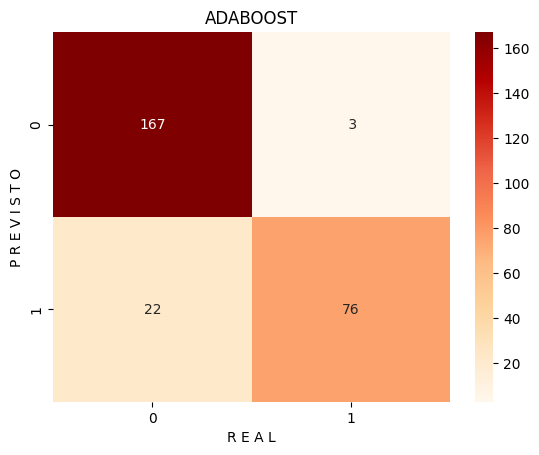

In [149]:
sns.heatmap(confusion_matrix(y_test, ada_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('ADABOOST')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')

* O numero 3 é um falso negativo, já que no teste os 3 sobreviveram, mas no treino eles sobreviveram;
* Assim como as 22 pessoas que foram previstas que viveriam, mas na verdade eles morream, chamados de falsos positivos.

### Interpretando a Matriz de Confusão
A diagonal da esquerda mostra o total de predições corretas, a da direita mostra o total de predições erradas.

* O número de predições corretas para AdaBoost é de **167(para mortos) + 76(sobreviventes)**.<br><br>

* **Erros**  
    * Classificou erradamente **3 como mortos (falso negativo)** 
    * E **22 como vivos (falso positivo)**

<a name="precision"></a>

$$Precisão = {\frac {Verdadeiros Positivos}{Verdadeiros Positivos + Falsos Positivos}} $$

<a name="accuracy"></a>

$$Revocação = {\frac {Verdadeiros Positivos}{Verdadeiros Positivos + Falsos Negativos}} $$

<a name="accuracy"></a>

$$Acuracidade = {\frac {Verdadeiros Positivos+Verdadeiros Negativos}{Total}} $$

<a name="accuracy"></a>

$$F1-Score = 2 x{\frac {Precisão \cdot Revocação}{Precisão + Revocação}} $$

### Importando métricas do Sklearn

In [150]:
from sklearn.metrics import (
    recall_score,
    accuracy_score, 
    precision_score,
    f1_score
)

### Revocação

In [151]:
recall_score(y_test, ada_pred)

0.7755102040816326

### Acuracidade

In [152]:
accuracy_score(y_test, ada_pred)

0.9067164179104478

### Precisão

In [153]:
precision_score(y_test, ada_pred)

0.9620253164556962

### F1-Score

In [154]:
f1_score(y_test, ada_pred)

0.8587570621468926

<a name="rocauc"></a>

# Curvas ROC e AUC 

O formato da curva contem várias informações, dentre elas, a taxa esperada de falsos positivos e taxa esperada de falsos negativos. 
* O quanto menor for o eixo x menor a quantidade de falsos positivos e maior verdadeiros negativos. 
* Quanto maiores os valores no eixo y, maior a quantidade de verdadeiros positivos e menor a quantidade de falsos negativos.



In [155]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Sem habilidade: ROC AUC = 0.500
AdaBoost: ROC AUC = 0.934


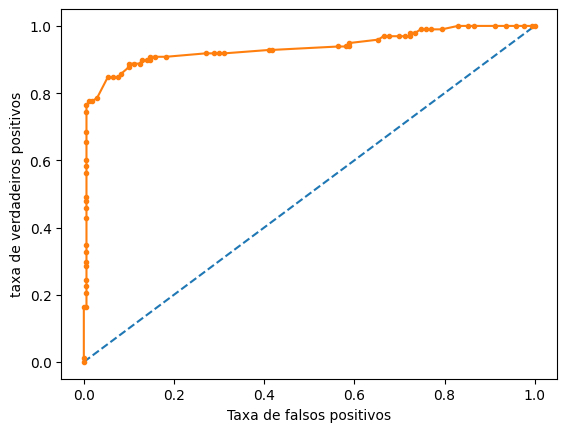

In [156]:
ns_probs = [0 for _ in range(len(y_test))] # no skill
ada_probs = ada.predict_proba(X_test)
ada_probs = ada_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
ada_auc = roc_auc_score(y_test, ada_probs)

print('Sem habilidade: ROC AUC = %.3f' %(ns_auc))
print('AdaBoost: ROC AUC = %.3f' %(ada_auc))

#calcular a curva ROC
ns_tfp, ns_tvp, _ = roc_curve(y_test, ns_probs)
ada_tfp, ada_tvp, _ = roc_curve(y_test, ada_probs)

plt.plot(ns_tfp, ns_tvp, linestyle='--', label='Sem habilidade')
plt.plot(ada_tfp, ada_tvp, marker='.', label='AdaBoost')

plt.xlabel('Taxa de falsos positivos')
plt.ylabel('taxa de verdadeiros positivos')

plt.show()

* Demonstra o quão bem ou quão ruim o nosso está em relação a um modelo sem habilidade nenhuma;
* Quanto maior a área, mais habilidade nosso modelo tem.

## Selecionando Threshold (Limite)

In [157]:
pred_proba = ada_probs >= 0.5

In [158]:
pred_proba = pd.Series(pred_proba).map({False: 0, True: 1}).values

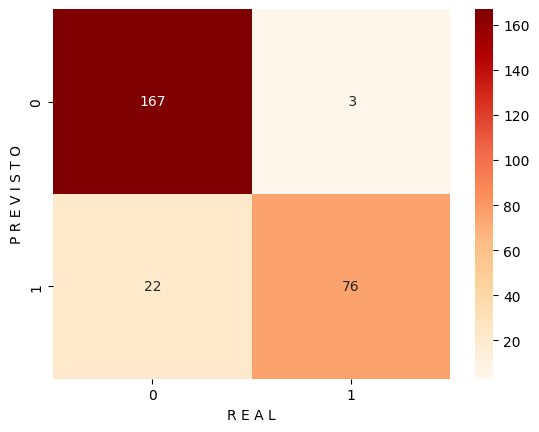

In [159]:
sns.heatmap(confusion_matrix(y_test, pred_proba), cmap='OrRd', annot=True, fmt='2.0f')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

<a name="hyperparam"></a>

# Customização de Hyper-Parâmetros 


**Parâmetros**

**n_jobs**: Quantidade de núcleos do CPU usados no processo de treino do modelo preditivo. Se for -1, todos os núcleos serão usados.

**n_estimators**: Quantidade de árvores de classificação usadas no modelo preditivo (10 é o padrão)

**max_depth**: Profundidade de árvore ou a quantidade de nós que ela deve se expandir. Se esse valor for muito alto, existe a chance de o modelo super-adequar _(overfit)_ o modelo.

**min_samples_leaf**: O número mínimo de amostras requeridas para ser considerado um ramo. Isso tende a suavizar o modelo.

**verbose**: Controla a saída de textos durante o processo de aprendizagem/treino. O valor 0 não mostra nenhum texto, enquanto 3 mostra o processo de aprendizagem de árvore a cada iteração.

In [160]:
from sklearn.model_selection import GridSearchCV

* ### Random Forest

In [161]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [2, 4],
    'min_samples_leaf': [1,2,3]
}

gd = GridSearchCV(estimator=RandomForestClassifier(random_state=123), param_grid=rf_params, verbose=True)

gd.fit(X_train, y_train)

print(gd.best_score_)
print(gd.best_estimator_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


0.8908903225806452
RandomForestClassifier(max_depth=4, random_state=123)


In [162]:
gd_pred = gd.predict(X_test)

<a name="ensembling"></a>

# Ensembling
Uma forma de aumentar a acuracidade ou performance do modelo preditivo. Ensembling é a combinação de vários modelos preditivos de forma a ter uma versão final mais poderosa e mais estável. Ensembling pode ser feito de 3 formas:
* Classificão de Votos (Voting Classifier)
* Ensacamento (Bagging)
* Impulsionamento (Boosting)



<a name="voting"></a>

* ### Classificação de Votos

In [163]:
misturados = [('KNN', KNeighborsClassifier(n_neighbors=10)),
                ('RBF', SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                ('RFor', RandomForestClassifier(n_estimators=100, random_state=123)),
                ('LR', LogisticRegression(C=0.05)),
                ('DT', DecisionTreeClassifier(random_state=123)),
                ('NB', GaussianNB()),
                ('svm', SVC(kernel='linear', probability=True))
              ]

In [168]:
from sklearn.ensemble import VotingClassifier
meu_ensemble = VotingClassifier(estimators=misturados, voting='soft').fit(X_train, y_train)

print(f'Score: {meu_ensemble.score(X_test, y_test)}')

cross = cross_val_score(meu_ensemble, X_test, y_test, cv=10, scoring='accuracy')
print(f'Score cross-validado: {cross.mean()}')

Score: 0.9029850746268657
Score cross-validado: 0.877065527065527


In [167]:
cross.mean()

0.8696581196581196

<a name="bagging"></a>

* ### Ensacamento
O Ensacamento aplica classificadores similares em pequenas partições, depois tira a média reduzindo a variância. Diferente da técnica de Classificação de Votos, Ensacamento usa classificadores similares aumentando a estabilidade. 

* #### Ensacamento KNN
Ele é ideal para usar com modelos que possuem muita variância. Pode ser usado com um pequeno valor de n_neighbours, como com um pequeno valor de n_estimators.

In [164]:
from sklearn.ensemble import BaggingClassifier

In [169]:
knn = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                        random_state=123, n_estimators=100)

knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print(f'Score: {knn.score(X_test, y_test)}')

cross = cross_val_score(knn, X_test, y_test, cv=10, scoring='accuracy')
print(f'Score cross-validado: {cross.mean()}')

Score: 0.7313432835820896
Score cross-validado: 0.7237891737891738


* #### Ensacamento DecisionTree


In [170]:
dtree = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                        random_state=123, n_estimators=100)

dtree.fit(X_train, y_train)
dtree_pred = knn.predict(X_test)

print(f'Score: {dtree.score(X_test, y_test)}')

cross = cross_val_score(dtree, X_test, y_test, cv=10, scoring='accuracy')
print(f'Score cross-validado: {cross.mean()}')

Score: 0.8880597014925373
Score cross-validado: 0.8810541310541311


<a name="boosting"></a>

* ### Impulsionamento
Impulsionamento é uma técnica ensembling que usa aprendizado sequenciado de classificadores. É um melhoramento gradual de um modelo fraco. O modelo é treinado no dataframe completo, de forma a focar nos erros, tentando melhorá-los iterativamente de forma contínua. 

* #### Exemplos (Impulsionamento Adaptativo): 
    * AdaBoost  
    * GradientBoostingClassifier 


* ### GradientBoostingClassifier

In [172]:
grad = GradientBoostingClassifier(n_estimators=100, random_state=123,learning_rate=0.1)

grad.fit(X_train, y_train)
grad_pred = knn.predict(X_test)

print(f'Score: {grad.score(X_test, y_test)}')

cross = cross_val_score(grad, X_test, y_test, cv=10, scoring='accuracy')
print(f'Score cross-validado: {cross.mean()}')

Score: 0.914179104477612
Score cross-validado: 0.8810541310541311


* ### Configurando Hyper-Parâmetros para o AdaBoost

In [174]:
n_estimator =[100, 200]
learn_rate = [0.05, 0.1, 0.3]
hyper={'n_estimators': n_estimator, 'learning_rate': learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)

gd.fit(X_train, y_train)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8909032258064518
AdaBoostClassifier(learning_rate=0.05, n_estimators=200)


In [175]:
adaboost_pred = gd.predict(X_test)

In [176]:
adaboost_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

<a name="combinado"></a>

<a name="fimportance"></a>

# Importância de Recursos _(Feature Importance)_ 



In [184]:
rf_params = {
    'n_jobs': -1,
    'n_estimators': 100,
    'max_depth': 2,
    'min_samples_leaf': 2,
    'verbose': 0
}

In [185]:
rf = ModeloAuxiliar(clf=RandomForestClassifier, seed=123, params=rf_params)

In [186]:
rf_features = rf.feature_importances(X_train, y_train)


In [187]:
rf_features

array([2.94250613e-02, 1.83193867e-03, 1.71989551e-03, 1.17323787e-01,
       2.57965774e-01, 1.58227448e-03, 4.57748671e-02, 0.00000000e+00,
       4.31715840e-03, 1.33572495e-01, 2.58505384e-03, 1.35296468e-03,
       5.76649312e-02, 3.18320535e-02, 9.04474584e-02, 1.97502758e-01,
       4.50429218e-03, 1.14514689e-05, 2.61162590e-04, 1.99676660e-04,
       0.00000000e+00, 1.31186480e-02, 7.00629805e-03])

In [190]:
cols = X_train.columns.values
cols

array(['Tarifa', 'PaisFilhos', 'IrmaosConjuge', 'TamanhoGrupo',
       'SobrevivenciaGrupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
       'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino',
       'Titulo_Outros', 'Titulo_Solteira', 'ExpectativaDeVida_morrer',
       'ExpectativaDeVida_viver', 'Sexo_mulher', 'Idade',
       'FaixaEtaria_(16.0, 32.0]', 'FaixaEtaria_(32.0, 48.0]',
       'FaixaEtaria_(48.0, 64.0]', 'FaixaEtaria_(64.0, 80.0]',
       'Familiares', 'Sozinho'], dtype=object)

In [191]:
features_dataframe = pd.DataFrame({'recursos': cols,
                                   'Importancia de recursos RForest': rf_features})

<Axes: ylabel='recursos'>

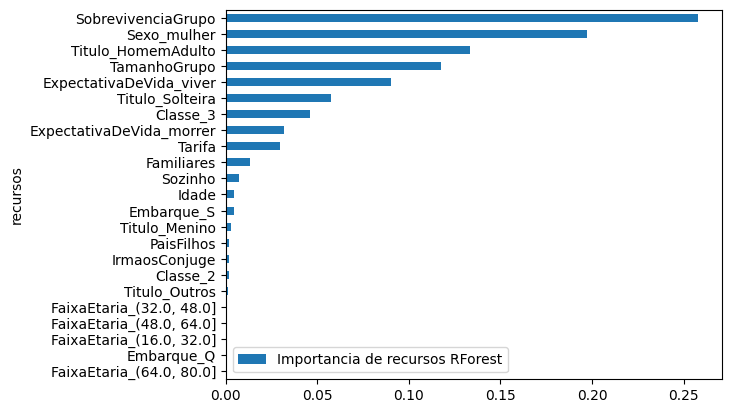

In [192]:
features_dataframe.sort_values(by='Importancia de recursos RForest').plot.barh(x='recursos')

In [193]:
meu_ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                             ('RBF', SVC(C=0.5, gamma=0.1, probability=True)),
                             ('RFor', RandomForestClassifier(random_state=123)),
                             ('LR', LogisticRegression(C=0.05)),
                             ('DT', DecisionTreeClassifier(random_state=123)),
                             ('NB', GaussianNB()),
                             ('svm', SVC(kernel='linear', probability=True))],
                 voting='soft')

In [194]:
meu_ensemble.score(X_test, y_test)

0.8917910447761194

In [195]:
ensemble_pred = meu_ensemble.predict(test[recursos])

In [197]:
ensemble_pred.shape

(418,)

In [198]:
test.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

<a name="submissao"></a>

# Submissão



In [199]:
submissao = pd.DataFrame({
    'PassangerId': test.index,
    'Survived': ensemble_pred
})

In [200]:
submissao

,PassangerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [201]:
submissao.shape

(418, 2)

In [203]:
submissao['Survived'] = submissao['Survived'].astype('int')

In [204]:
submissao

,PassangerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [205]:
submissao.to_csv('meu_ensemble.csv', index=False)